# Lesson1 手書き文字認識をしよう（ニューラルネットワーク入門）

## 目次

- 3.4の解答
- Section4 実装②
  - 4.1 Fashion MNIST
  - 4.2 実装

## 3.4の解答

1. 損失関数のパラメータ微分のことを何というか  
  ①スケーリング　**②勾配**　③学習率　④SGD
2. 活性化関数の選択により対処可能な問題を何というか  
  **①勾配消失問題**　②次元の呪い　③固有値問題　④バイアス―バリアンストレードオフ
3. 損失関数にペナルティ項を加え、パラメータの自由度を下げる手法を何というか  
  ①モーメンタム　②部分空間法　**③正則化**　④誤差逆伝播法
4. 過学習への対処としてふさわしくないものはどれか  
  ①ドロップアウト　**②スケーリング**　③ElasticNet　④早期終了

## Section4 実装②

最後に、この章の復習として、ファッションデータの分類をMLPを用いて行ってみましょう。

### 4.1 Fashion MNIST

Fashion MNIST
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data?hl=ja

28x28の画像データで次の10種類の衣類のいずれかに分類される. 訓練データは60000件, テストデータは10000件ある.
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [7]:
# データのロード
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
# データセットの大きさ確認
print(x_train.shape) # 訓練データのサイズ
print(x_test.shape) # テストデータのサイズ

(60000, 28, 28)
(10000, 28, 28)


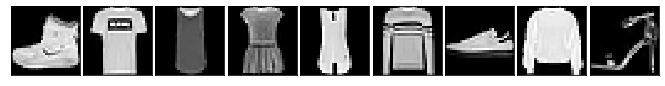

In [9]:
# データセットの表示
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

### 4.2 実装

In [10]:
# データの整形
from tensorflow.keras.utils import to_categorical

# (28,28)を(1,784)に変換して色を(0~255)から(0～1)にscaling
x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) /255
#(0~9)のラベルをone-hot encordinh
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
# モデル構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# モデルの容器を作成
model = Sequential()
# layerを設定
model.add(Dense(512, input_shape=(784,), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))
# 損失関数, 最適化手法, 評価関数を設定
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 比較用にsection2と類似のモデルを準備
model0 = Sequential()

model0.add(Dense(units=256, input_shape=(784,)))
model0.add(Activation('relu'))
model0.add(Dense(units=100))
model0.add(Activation('relu'))
model0.add(Dense(units=10))
model0.add(Activation('softmax'))

model0.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


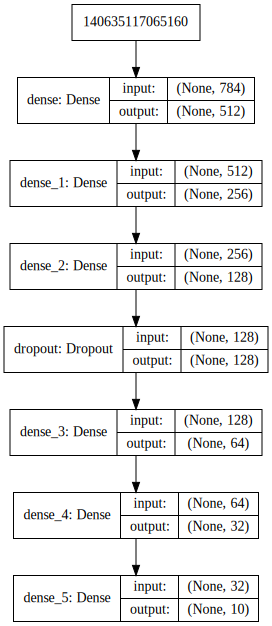

In [13]:
# モデルmodelを可視化
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

input layer (784) -> (512), 活性化関数ReLU, 初期化 Heの初期化  
hidden layer1 (512) -> (256), 活性化関数ReLU, 初期化 Heの初期化  
hidden layer2 (256) -> (128), 活性化関数ReLU, 初期化 Heの初期化  
Drop out layer (128) -> (128), 確率0.3で次の層の入力を0にする  
hidden layer3 (128) -> (64), 活性化関数ReLU, 初期化 Heの初期化  
hidden layer4 (64) -> (32), 活性化関数ReLU, 初期化 Heの初期化  
hidden layer5 (32) -> (10), 活性化関数ReLU, 初期化 Heの初期化  
output layer (10) -> (10), 出力層の設計 Softmax

batch_size  
batch_sizeはデータセットをいくつかのサブセットにわけること. 例えばデータセットが1000件でbatch_size=200とすると, 200件のデータがあるサブセットが5つ作られる. batch_sizeは2の乗数で決められることが多い.

epoch  
データセットのバッチサイズをN個のサブセットに分けて各サブセットを1回回す. つまりNか学習が行われる. これを1回繰り返すことを1epochという. 通常は損失関数が収束するまで数～数十epoch回すことが多い.

In [14]:
# 学習
from tensorflow.keras.callbacks import EarlyStopping

# patience 指定したepoch数改善がないと訓練を停止する.
early_stopping = EarlyStopping(patience=10, verbose=1)

model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])
model0.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 2s - loss: 1.0229 - acc: 0.6541 - val_loss: 0.5461 - val_acc: 0.8125
Epoch 2/10
 - 2s - loss: 0.4860 - acc: 0.8325 - val_loss: 0.4268 - val_acc: 0.8512
Epoch 3/10
 - 2s - loss: 0.4055 - acc: 0.8554 - val_loss: 0.3950 - val_acc: 0.8593
Epoch 4/10
 - 2s - loss: 0.3710 - acc: 0.8669 - val_loss: 0.3660 - val_acc: 0.8683
Epoch 5/10
 - 2s - loss: 0.3428 - acc: 0.8761 - val_loss: 0.3645 - val_acc: 0.8707
Epoch 6/10
 - 2s - loss: 0.3261 - acc: 0.8812 - val_loss: 0.3584 - val_acc: 0.8704
Epoch 7/10
 - 2s - loss: 0.3072 - acc: 0.8884 - val_loss: 0.3443 - val_acc: 0.8780
Epoch 8/10
 - 2s - loss: 0.2911 - acc: 0.8932 - val_loss: 0.3494 - val_acc: 0.8735
Epoch 9/10
 - 2s - loss: 0.2856 - acc: 0.8952 - val_loss: 0.3336 - val_acc: 0.8795
Epoch 10/10
 - 2s - loss: 0.2707 - acc: 0.9005 - val_loss: 0.3388 - val_acc: 0.8779
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - lo

In [15]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score0 = model0.evaluate(x_test, y_test, verbose=0)
print('Test loss by model0:', score0[0])
print('Test accuracy by model0:', score0[1])

Test loss: 0.33883500578403475
Test accuracy: 0.8779
Test loss by model0: 0.6699333357810974
Test accuracy by model0: 0.7734


In [18]:
# モデルによる予測
classes = model.predict(x_test,batch_size=1000)
classes[0]

array([1.7937046e-07, 1.3800313e-04, 1.6723225e-06, 3.4276804e-06,
       5.7466961e-05, 1.8459562e-03, 1.5424416e-06, 1.9704947e-01,
       3.2229576e-04, 8.0058002e-01], dtype=float32)